## IMAGE AUGMENTATION

### Import library yang akan kita butuhkan

In [65]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpig
import splitfolders as sf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

### Menggunakan library splitfolders untuk membagi dataset menjadi train, val, dan test

In [30]:
sf.ratio('Batik', output="output", seed=1337, ratio=(.8, 0.1,0.1))

### Melihat sampel gambar

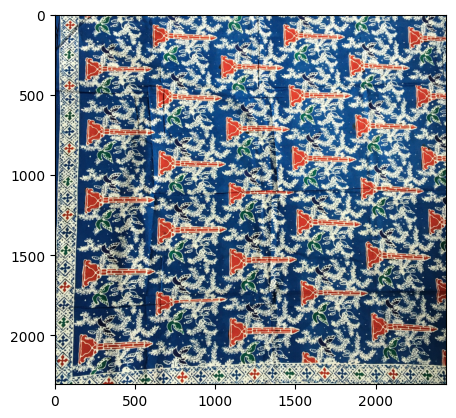

In [31]:
class_names = ['Asem Sinom',
               'asem warak',
               'blekok',
               'Tugu Muda']

for i in range (4):
    nama_gambar = os.path.join(
        'Batik', class_names[i], class_names[i]+ ' (1).JPG'
    )
    gambar = plt.imread(nama_gambar)
    plt.subplot(1,1,1)
    plt.imshow(gambar)

### Membuat ImageDataGenerator untuk melakukan augmentasi gambar

In [32]:
image_datagen = ImageDataGenerator(
    rescale = 1./255.0,
    fill_mode = 'nearest',
    validation_split = 0.2 # harus ada jika tidak ada folder validation
)

### Melakukan augmentasi gambar pada data training dan validasi

In [33]:
## Jika tidak memiliki folder validation
TRAIN_DIR = './output/train/'
train_generator = image_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(150,150),
    batch_size = 32,
    shuffle=True,
    class_mode = 'categorical', # isi 'binary' jika kelas hanya ada 2
    subset = 'training' # wajib ada subset, karena membedakan train/val
)

VAL_DIR = './output/val/'
val_generator = image_datagen.flow_from_directory(
    VAL_DIR,
    target_size=(150,150),
    batch_size = 32,
    shuffle=True,
    class_mode = 'categorical', # isi 'binary' jika kelas hanya ada 2
    subset = 'validation' # wajib ada subset, karena membedakan train/val
)

Found 970 images belonging to 5 classes.


Found 30 images belonging to 5 classes.


### Mengimport library untuk membuat model

In [34]:
from tensorflow.keras import Sequential, callbacks
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

### Membuat Model CNN

In [35]:
model = tf.keras.Sequential([
    #CNN (Feature Extraction Layers)                (None, 150, 150, 3) atau [150, 150, 3]
    Conv2D(128, 3, activation='relu', input_shape=[150, 150, 3]),
    MaxPooling2D(2,2),
    Conv2D(64, 3, activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),

    # DNN (Fully-Connected Layer)
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')
])

model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

### Melakukan training

In [36]:
hasil = model.fit(
    train_generator, 
    validation_data=val_generator, 
    epochs=5, 
    verbose=1,
)

Epoch 1/5
31/31 [==============================] - 146s 5s/step - loss: 0.5663 - accuracy: 0.7825 - val_loss: 0.0587 - val_accuracy: 1.0000
Epoch 2/5
31/31 [==============================] - 103s 3s/step - loss: 0.0314 - accuracy: 0.9959 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 3/5
31/31 [==============================] - 102s 3s/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 2.2938e-04 - val_accuracy: 1.0000
Epoch 4/5
31/31 [==============================] - 101s 3s/step - loss: 3.7506e-04 - accuracy: 1.0000 - val_loss: 9.7800e-05 - val_accuracy: 1.0000
Epoch 5/5
31/31 [==============================] - 103s 3s/step - loss: 1.9571e-04 - accuracy: 1.0000 - val_loss: 6.7728e-05 - val_accuracy: 1.0000


### Melakukan augmentasi gambar pada data test

In [71]:
TEST_DIR = './output/test/'
test_generator = image_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(150,150),
    batch_size = 32,
    shuffle=True,
    class_mode = 'categorical', # isi 'binary' jika kelas hanya ada 2
)

Found 154 images belonging to 5 classes.


### Melakukan evaluasi model

In [43]:
model.evaluate(test_generator)

5/5 [==============================] - 16s 3s/step - loss: 1.9077e-04 - accuracy: 1.0000


[0.00019076632452197373, 1.0]

### Grafik Progress Accuracy dan Loss tiap Epoch

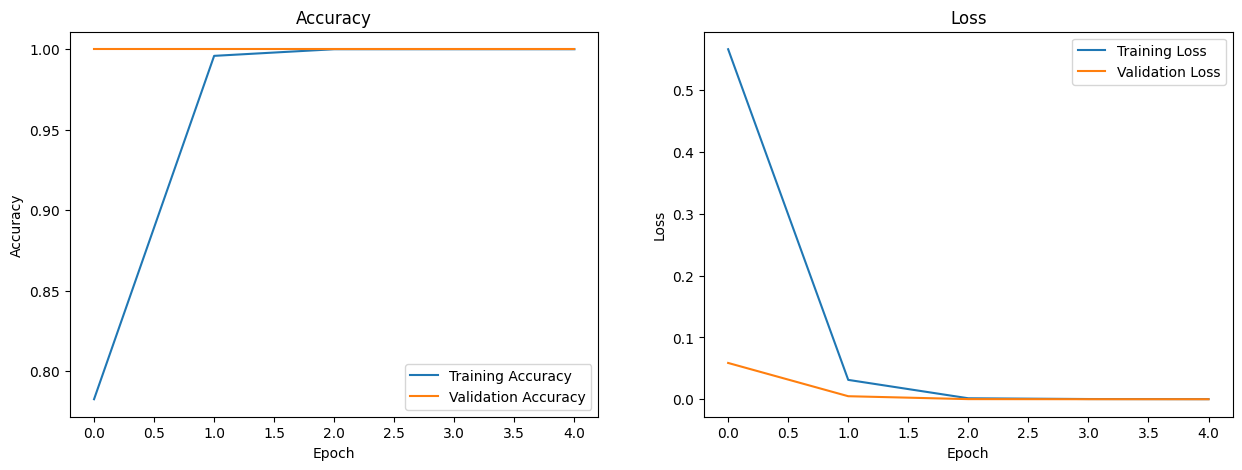

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(hasil.history['accuracy'], label='Training Accuracy')
plt.plot(hasil.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hasil.history['loss'], label='Training Loss')
plt.plot(hasil.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Melakukan plotting gambar untuk melihat hasil prediksi

1/1 [==============================] - 0s 140ms/step


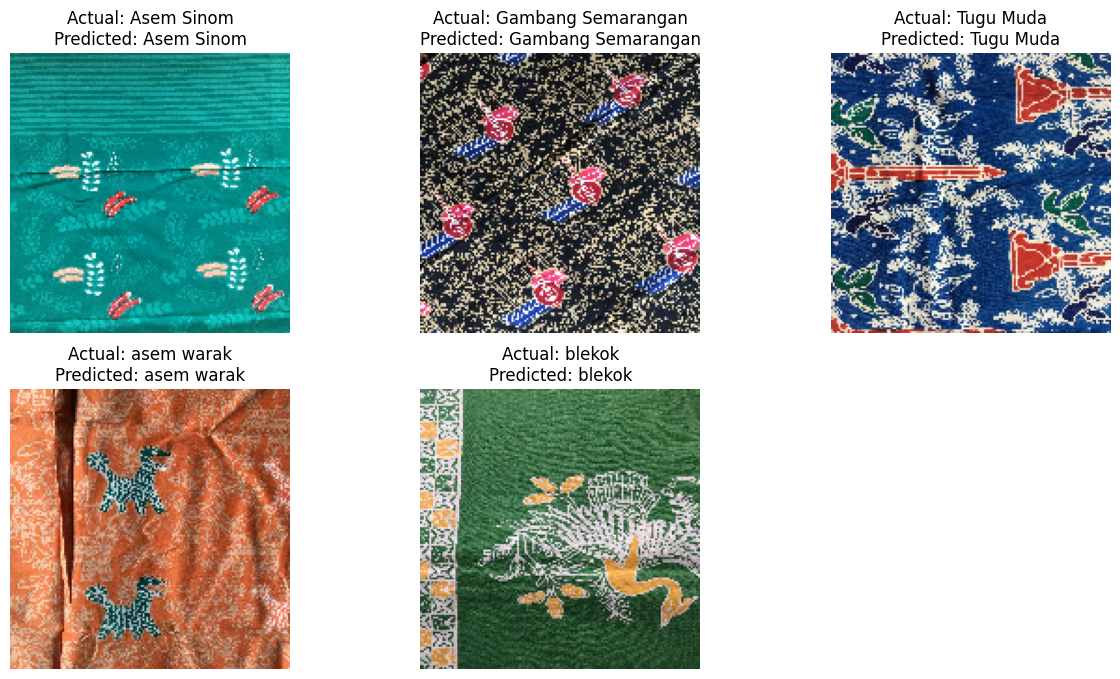

In [73]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

class_labels = sorted(os.listdir(TEST_DIR))

test_images = []

for class_label in class_labels:
    class_path = os.path.join(TEST_DIR, class_label)
    img_name = os.listdir(class_path)[0]
    img_path = os.path.join(class_path, img_name)
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    test_images.append(img_array)

test_images = np.vstack(test_images)

predictions = model.predict(test_images)

plt.figure(figsize=(15, 8))

for i in range(len(class_labels)):
    plt.subplot(2, 3, i + 1)

    img_path = os.path.join(TEST_DIR, class_labels[i], os.listdir(os.path.join(TEST_DIR, class_labels[i]))[0])
    img = image.load_img(img_path, target_size=(150, 150))
    plt.imshow(img)
    plt.title(f'Actual: {class_labels[i]}\nPredicted: {class_labels[np.argmax(predictions[i])]}')
    plt.axis('off')

plt.show()


Link dataset: [Batik Semarang](https://www.kaggle.com/datasets/edywinarno/semarang-batik-dataset)